In [1]:
import os
import numpy as np

In [2]:
path_to_series = os.path.join(".", "datasets", "ecg-heartbeat-av.csv")
f = open(path_to_series)
series = np.array(f.readlines(), dtype=np.double)

In [11]:
# z-normalize time series
series = (series - np.mean(series, axis=0)) / np.std(series, axis=0)

# Parameter rho determines the 'strictness' of the algorithm  
#   - higher -> more strict (more similarity in discovered motif sets)
#   - lower  -> less strict (less similarity in discovered motif sets) 
rho = 0.60

# Number of motifs to be found
nb_motifs = 2

fs = 128  # sampling frequency
# Heartbeats last 0.6s - 1s (equivalent to 60-100 bpm)
l_min = int(0.6 * fs)
l_max = int(  1 * fs)

# This parameter determines how much the motifs may overlap (intra and inter motif set)
overlap = 0.25

In [4]:
import locomotif.locomotif as locomotif
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap)
print(motif_sets)

[[(1769, 1870), (1663, 1771), (1868, 1977), (1346, 1472), (2156, 2266), (1557, 1665), (1975, 2074), (1235, 1348), (2264, 2381), (1471, 1558), (2072, 2158), (2824, 2940), (2378, 2455), (2547, 2646), (2453, 2549), (2644, 2721), (2719, 2826)], [(486, 607), (358, 479), (614, 735), (230, 351), (742, 836), (102, 223), (0, 95)]]


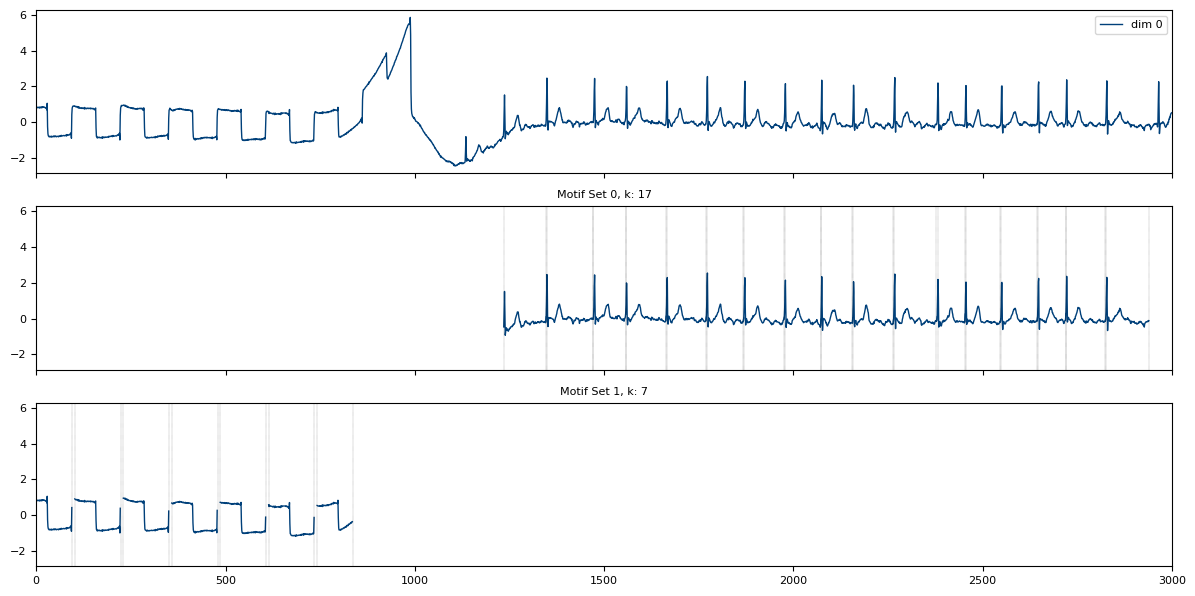

In [5]:
import locomotif.visualize as visualize
import matplotlib.pyplot as plt
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

### Without Time Warping

In [12]:
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap, warping=False)
print(motif_sets)

[[(2794, 2907), (1945, 2058), (1838, 1951), (2234, 2347), (1441, 1554), (1315, 1428), (1739, 1852), (2041, 2154), (2422, 2535), (1633, 1746), (1526, 1639), (2688, 2801), (2125, 2238)], [(416, 544), (288, 416), (544, 672), (160, 288), (672, 800), (32, 160)]]


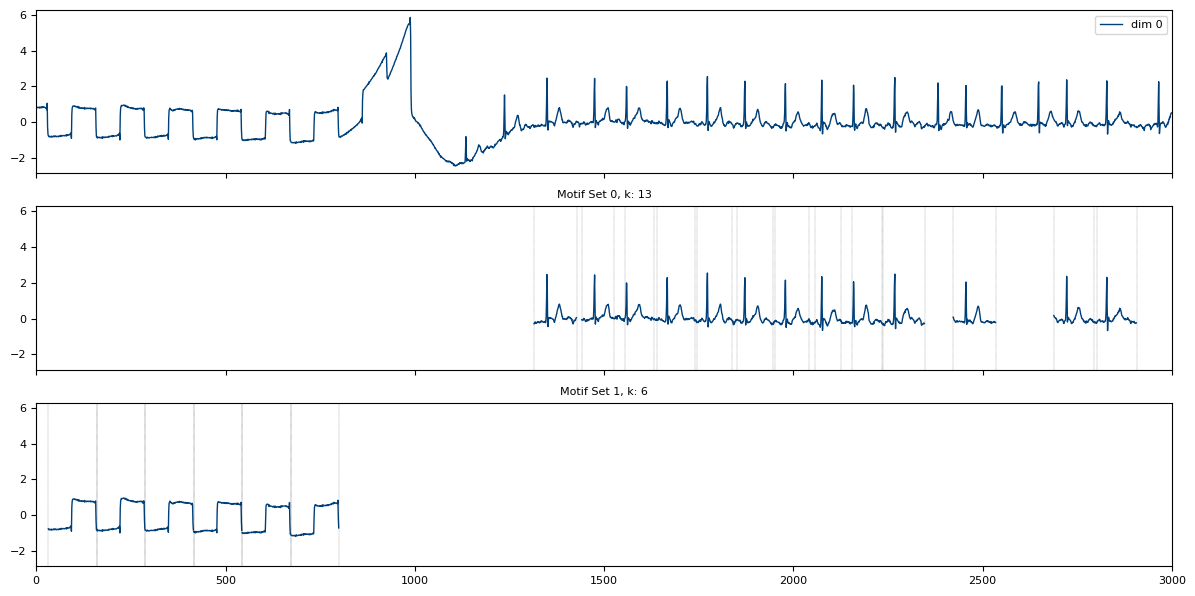

In [13]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()

In [14]:
print([e-b for motif_set in motif_sets for (b, e) in motif_set])

[113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 128, 128, 128, 128, 128, 128]


### Start and End Constraints

In [8]:
# start_mask specifies whether a motif can start at a certain time point (same for end_mask)
# for example: motifs can only start in the second half of the time series:
n = len(series)
start_mask = np.full(n, True)
start_mask[:n//2] = False

In [9]:
motif_sets = locomotif.apply_locomotif(series, rho, l_min, l_max, nb_motifs, overlap=overlap, start_mask=start_mask, end_mask=None)
print(motif_sets)

[[(1631, 1755), (1540, 1649), (1738, 1854), (2506, 2632), (1314, 1457), (1938, 2059), (2040, 2144), (2129, 2249), (1430, 1550), (1838, 1956), (2614, 2720), (2227, 2354), (2435, 2531), (2331, 2447), (2700, 2809), (2787, 2913)], [(2883, 2964), (1274, 1348)]]


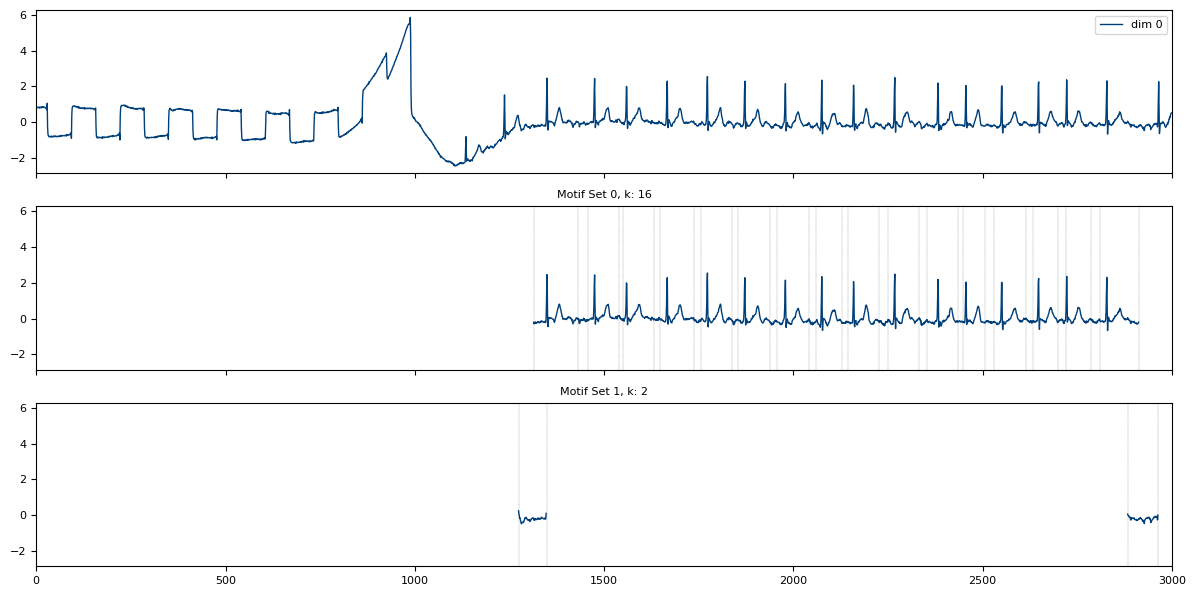

In [10]:
fig, ax = visualize.plot_motif_sets(series, motif_sets)
plt.savefig('example.png')
plt.show()